In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping 
from keras import initializers, regularizers

plt.style.use('seaborn')

In [3]:
df_bike_data = pd.read_csv('bike.csv')

print(f'Total Data: {len(df_bike_data)}\n')
print(f'Data Shape: {df_bike_data.shape}\n')
print(df_bike_data.info(),'\n')
print(df_bike_data.isnull().sum(),'\n')
df_bike_data.head(5)

Total Data: 731

Data Shape: (731, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

instant       0
dteday        0
season        

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
x_data = df_bike_data.drop(['instant', 'dteday', 'cnt'], axis=1).values
y_data = df_bike_data.cnt.values

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state=1)

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((511, 13), (220, 13), (511,), (220,))

Epoch 1/10
11/11 [==============================] - 1s 19ms/step - loss: 15195686.0000 - mae: 3556.9512 - val_loss: 6448602.0000 - val_mae: 2275.5215
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 4579183.0000 - mae: 1906.5641 - val_loss: 1441008.2500 - val_mae: 1037.7449
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 895973.4375 - mae: 761.6996 - val_loss: 161823.9844 - val_mae: 256.8396
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 145209.2969 - mae: 251.9183 - val_loss: 82889.8359 - val_mae: 234.3482
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 78238.2344 - mae: 217.0989 - val_loss: 53531.0938 - val_mae: 197.1901
Epoch 6/10
11/11 [==============================] - 0s 7ms/step - loss: 37569.0977 - mae: 152.3988 - val_loss: 17906.2031 - val_mae: 104.7067
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 13775.9443 - mae: 91.0095 - val_loss: 7510.3345 - val_mae: 

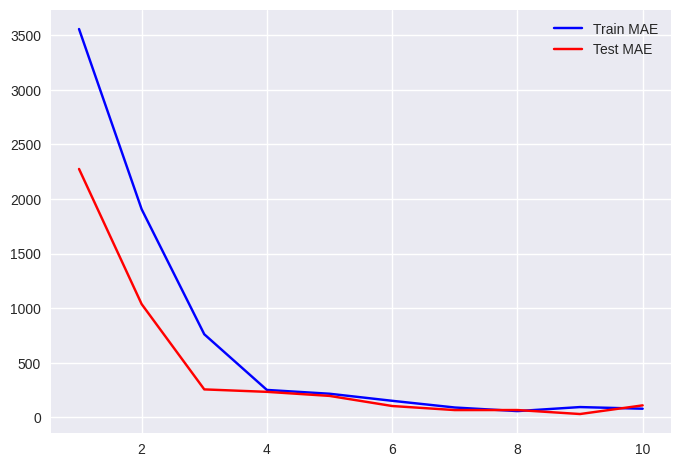

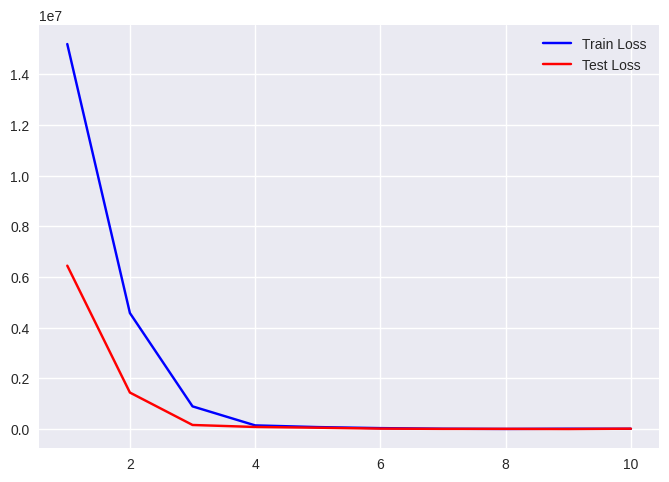

In [9]:
l1 = 50
l2 = 100

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=10, batch_size=50,
                    validation_data=(x_test, y_test))

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

Epoch 1/10
11/11 [==============================] - 1s 17ms/step - loss: 20093264.0000 - mae: 4114.6514 - val_loss: 11370429.0000 - val_mae: 3050.6074
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 9378515.0000 - mae: 2806.3926 - val_loss: 4878961.5000 - val_mae: 1990.8793
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 3771649.5000 - mae: 1726.5217 - val_loss: 1265697.7500 - val_mae: 996.0806
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 926593.1875 - mae: 751.0284 - val_loss: 180510.3281 - val_mae: 325.2791
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 321846.4375 - mae: 426.2089 - val_loss: 53146.5469 - val_mae: 142.8979
Epoch 6/10
11/11 [==============================] - 0s 7ms/step - loss: 267435.1562 - mae: 385.3597 - val_loss: 35505.9219 - val_mae: 119.0900
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 271449.8438 - mae: 390.7629 - val_loss: 29805.6562 -

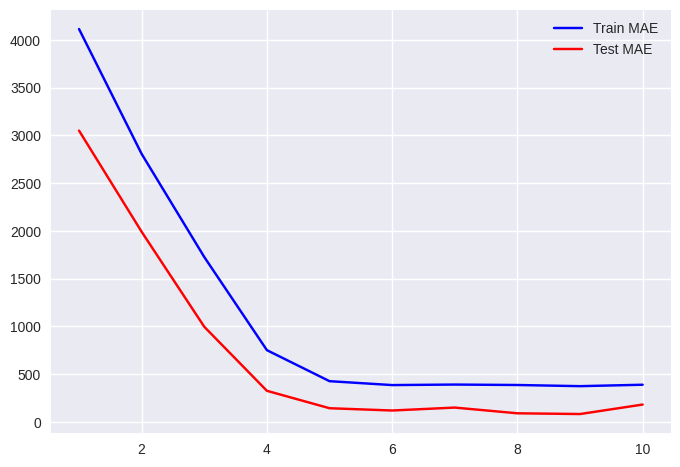

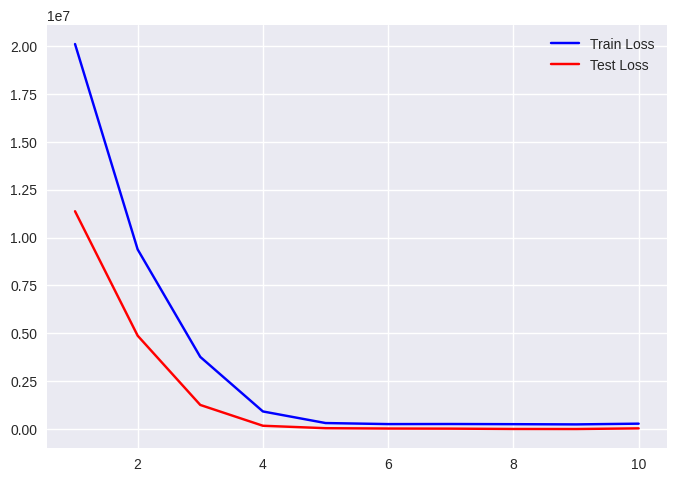

In [11]:
l1 = 50
l2 = 100

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=10, batch_size=50,
                    validation_data=(x_test, y_test))

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

Epoch 1/10
11/11 [==============================] - 1s 18ms/step - loss: 8759633.0000 - mae: 2597.9021 - val_loss: 1642779.5000 - val_mae: 1114.3199
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 771853.8125 - mae: 666.6357 - val_loss: 121780.4844 - val_mae: 238.0177
Epoch 3/10
11/11 [==============================] - 0s 8ms/step - loss: 115574.6016 - mae: 245.3817 - val_loss: 71933.2500 - val_mae: 192.7103
Epoch 4/10
11/11 [==============================] - 0s 8ms/step - loss: 62070.2891 - mae: 188.2649 - val_loss: 33205.5391 - val_mae: 141.7935
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 23328.5703 - mae: 117.9606 - val_loss: 12325.3145 - val_mae: 85.2131
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 7386.3525 - mae: 68.8273 - val_loss: 6649.3682 - val_mae: 68.5944
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 23241.9629 - mae: 125.5091 - val_loss: 6102.7041 - val_mae: 56.3903
Epo

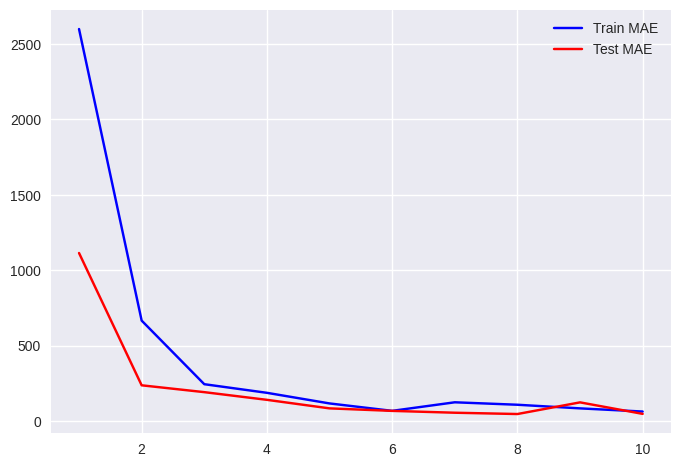

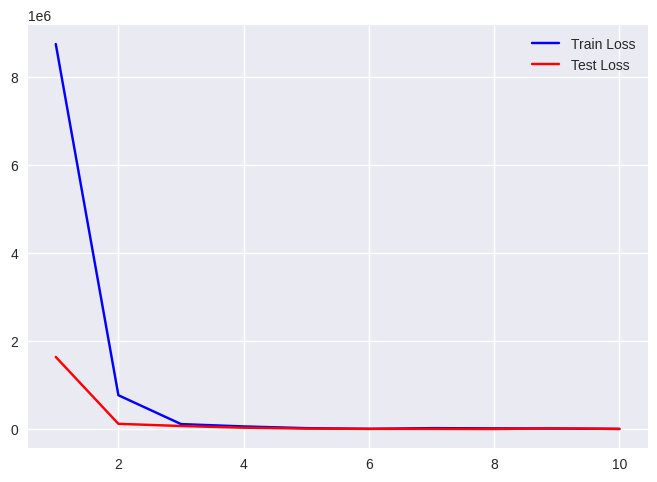

In [12]:
l1 = 50
l2 = 100

early_stop = EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=10, batch_size=50,
                    validation_data=(x_test, y_test), callbacks=[early_stop])

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

Epoch 1/10
6/6 [==============================] - 1s 43ms/step - loss: 10189448.0000 - mae: 2863.6484 - val_loss: 2906134.7500 - val_mae: 1509.3131
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 2192979.5000 - mae: 1251.2183 - val_loss: 367922.9688 - val_mae: 459.1206
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 500584.8438 - mae: 517.7970 - val_loss: 117509.7422 - val_mae: 221.4527
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 337150.9688 - mae: 432.3628 - val_loss: 84711.6094 - val_mae: 189.9309
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 316625.8438 - mae: 413.3234 - val_loss: 56114.3867 - val_mae: 161.1875
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 286988.6562 - mae: 392.5423 - val_loss: 34770.2305 - val_mae: 125.3215
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 259340.8906 - mae: 371.5545 - val_loss: 12311.6660 - val_mae: 82.951

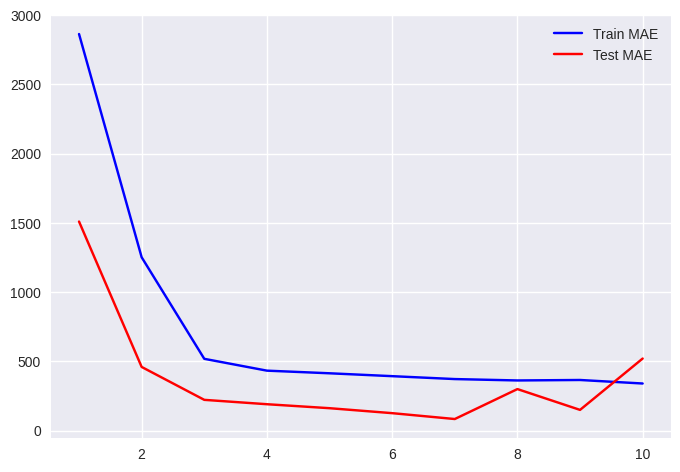

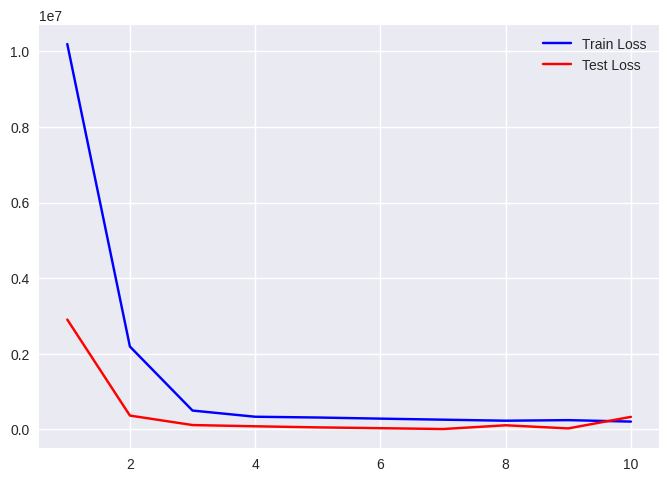

In [13]:
l1 = 100
l2 = 100


model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=10, batch_size=100,
                    validation_data=(x_test, y_test), callbacks=[early_stop])

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

Epoch 1/15
6/6 [==============================] - 1s 35ms/step - loss: 20748018.0000 - mae: 4153.6938 - val_loss: 6998972.0000 - val_mae: 2350.3596
Epoch 2/15
6/6 [==============================] - 0s 10ms/step - loss: 4970346.5000 - mae: 1909.4871 - val_loss: 1107054.8750 - val_mae: 748.5286
Epoch 3/15
6/6 [==============================] - 0s 11ms/step - loss: 901004.8750 - mae: 648.1920 - val_loss: 421038.0312 - val_mae: 466.4285
Epoch 4/15
6/6 [==============================] - 0s 11ms/step - loss: 484058.3750 - mae: 498.2348 - val_loss: 326582.0312 - val_mae: 409.6994
Epoch 5/15
6/6 [==============================] - 0s 10ms/step - loss: 372837.0625 - mae: 430.4252 - val_loss: 246171.7500 - val_mae: 334.3616
Epoch 6/15
6/6 [==============================] - 0s 10ms/step - loss: 271182.3438 - mae: 368.1050 - val_loss: 307890.0625 - val_mae: 482.7369
Epoch 7/15
6/6 [==============================] - 0s 10ms/step - loss: 206568.0469 - mae: 339.5038 - val_loss: 162701.0156 - val_mae: 

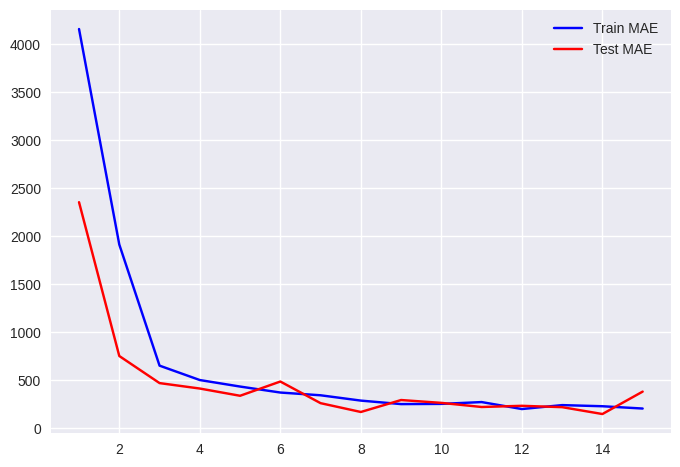

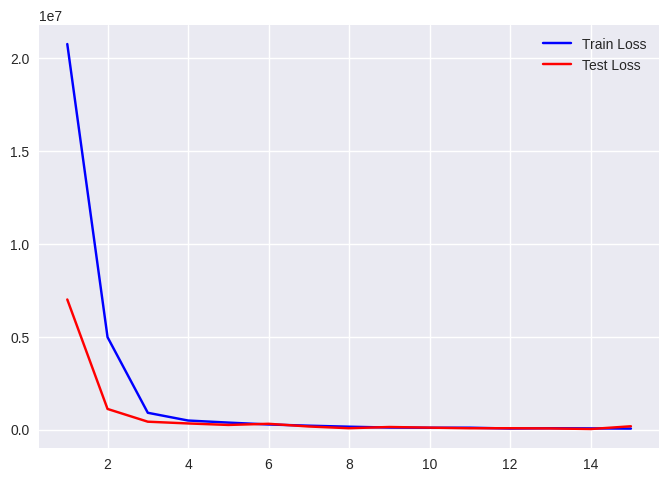

In [14]:
l1 = 100
l2 = 100
l3 = 100

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dense(l3, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=15, batch_size=100,
                    validation_data=(x_test, y_test))

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

Epoch 1/15
6/6 [==============================] - 1s 36ms/step - loss: 21075458.0000 - mae: 4218.4741 - val_loss: 10709640.0000 - val_mae: 2952.5750
Epoch 2/15
6/6 [==============================] - 0s 9ms/step - loss: 6865398.5000 - mae: 2330.2671 - val_loss: 455703.6250 - val_mae: 528.9118
Epoch 3/15
6/6 [==============================] - 0s 12ms/step - loss: 243287.7031 - mae: 342.1719 - val_loss: 67605.8203 - val_mae: 195.5983
Epoch 4/15
6/6 [==============================] - 0s 12ms/step - loss: 64450.9609 - mae: 186.2215 - val_loss: 27675.9863 - val_mae: 123.7255
Epoch 5/15
6/6 [==============================] - 0s 12ms/step - loss: 26137.7422 - mae: 121.8917 - val_loss: 10631.3184 - val_mae: 76.0588
Epoch 6/15
6/6 [==============================] - 0s 10ms/step - loss: 8148.5601 - mae: 69.0372 - val_loss: 5439.7754 - val_mae: 60.4615
Epoch 7/15
6/6 [==============================] - 0s 13ms/step - loss: 35758.2344 - mae: 149.1729 - val_loss: 179923.3594 - val_mae: 386.4956
Epoch

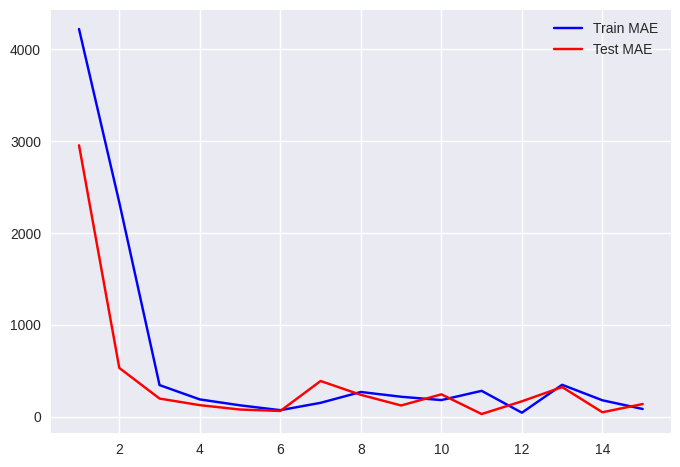

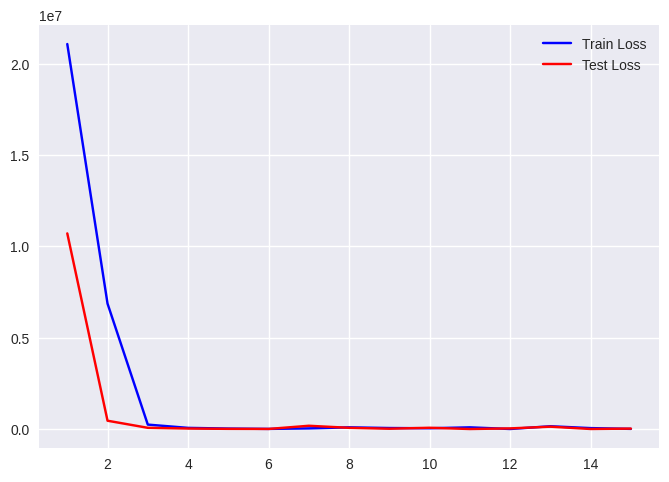

In [15]:
l1 = 100
l2 = 100
l3 = 100
l4 = 50

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dense(l3, activation='relu'))
model.add(Dense(l4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=15, batch_size=100,
                    validation_data=(x_test, y_test))

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

Epoch 1/25
6/6 [==============================] - 2s 60ms/step - loss: 17079148.0000 - mae: 3775.9468 - val_loss: 3437758.5000 - val_mae: 1654.4690
Epoch 2/25
6/6 [==============================] - 0s 40ms/step - loss: 1481211.2500 - mae: 914.4705 - val_loss: 85419.1094 - val_mae: 204.5582
Epoch 3/25
6/6 [==============================] - 0s 38ms/step - loss: 93679.1719 - mae: 230.8029 - val_loss: 68012.4844 - val_mae: 166.5262
Epoch 4/25
6/6 [==============================] - 0s 25ms/step - loss: 63168.2461 - mae: 186.2066 - val_loss: 41679.1133 - val_mae: 134.5884
Epoch 5/25
6/6 [==============================] - 0s 13ms/step - loss: 46751.9844 - mae: 162.4840 - val_loss: 20987.8887 - val_mae: 125.0901
Epoch 6/25
6/6 [==============================] - 0s 11ms/step - loss: 23286.6426 - mae: 118.9951 - val_loss: 128369.3828 - val_mae: 324.7984
Epoch 7/25
6/6 [==============================] - 0s 9ms/step - loss: 145619.3125 - mae: 344.6499 - val_loss: 124156.2109 - val_mae: 322.0408
Ep

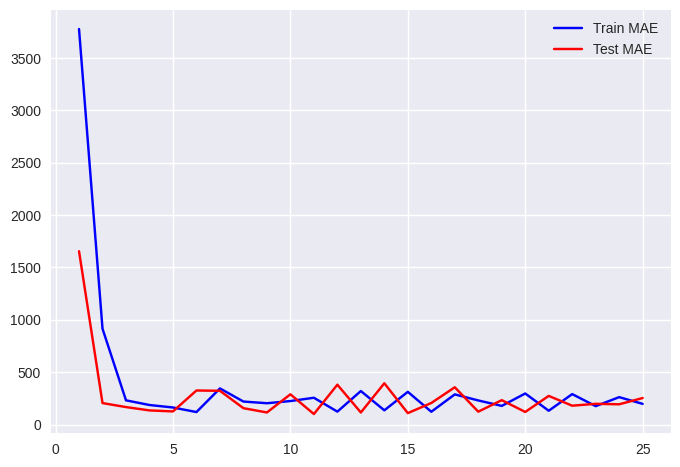

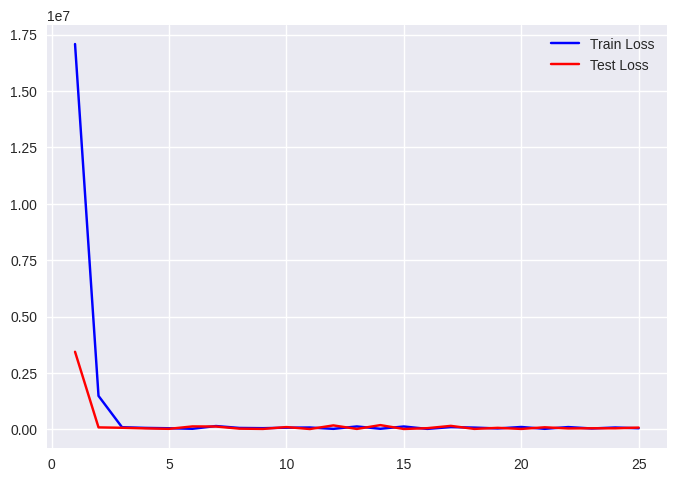

In [19]:
l1 = 100
l2 = 100
l3 = 100
l4 = 50

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dense(l3, activation='relu'))
model.add(Dense(l4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=25, batch_size=100,
                    validation_data=(x_test, y_test))

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()

<h3>The conclusion of the output as the Mean Absolute Error reaches the lowest among all other methods</h3>

Epoch 1/15
6/6 [==============================] - 1s 50ms/step - loss: 24160686.0000 - mae: 4530.0342 - val_loss: 15666008.0000 - val_mae: 3575.7046
Epoch 2/15
6/6 [==============================] - 0s 14ms/step - loss: 14510895.0000 - mae: 3505.1243 - val_loss: 6801105.0000 - val_mae: 2343.1819
Epoch 3/15
6/6 [==============================] - 0s 12ms/step - loss: 4809759.5000 - mae: 1961.6697 - val_loss: 883447.8750 - val_mae: 789.9821
Epoch 4/15
6/6 [==============================] - 0s 10ms/step - loss: 495268.5312 - mae: 519.9756 - val_loss: 106608.5234 - val_mae: 239.9285
Epoch 5/15
6/6 [==============================] - 0s 12ms/step - loss: 118665.7422 - mae: 251.7439 - val_loss: 84962.1172 - val_mae: 210.9385
Epoch 6/15
6/6 [==============================] - 0s 17ms/step - loss: 95362.3203 - mae: 230.1264 - val_loss: 81075.0781 - val_mae: 239.6466
Epoch 7/15
6/6 [==============================] - 0s 13ms/step - loss: 72332.3984 - mae: 208.4610 - val_loss: 60689.7109 - val_mae: 

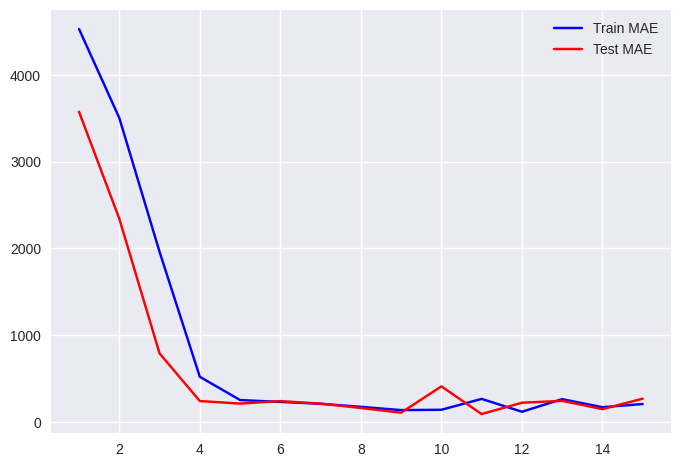

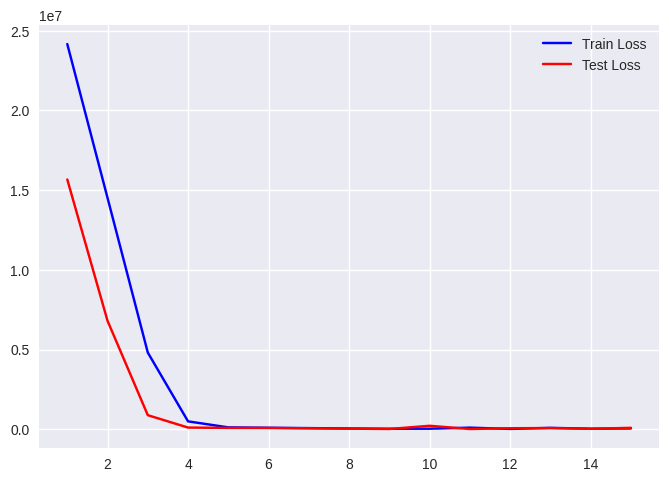

In [20]:
l1 = 100
l2 = 100
l3 = 100
l4 = 50

model = Sequential()
model.add(Dense(l1, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(l2, activation='relu'))
model.add(Dense(l3, activation='relu'))
model.add(Dense(l4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=15, batch_size=100,
                    validation_data=(x_test, y_test))

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()